In [26]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA #for cluster visualization (and dimensionality reduction)

from sklearn.ensemble import RandomForestClassifier #for feature importance

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [27]:
df = pd.read_csv("MASTER_DATASET.csv")

In [28]:
df.drop(columns=['pcode'], inplace=True) # dropping the unneeded postal code column
df.head()

,oblast_or_country,# total population,# female population,# male population,# female younger population (0 - 14 years),# male younger population (0 - 14 years),# total younger population (0 - 14 years),# female older population (60 years and up),# male older population (60 years and up),# total older population (60 years and up),# registered IDPs,# people exposed,# people affected,# people in need,# people in level 1 humanitarian condition,# people in level 2 humanitarian condition,# people in level 3 humanitarian condition,# people in level 4 humanitarian condition,# people in level 5 humanitarian condition,# km² landmass affected,# km² controlled by Ukrainian authorities/forces,# km² controlled by Russian forces,# km² unconfirmed control,# battles,# explosions/remote violence,# violence against civilians,# fatalities,# civilian fatalities,# civilian injuries,# total infrastructure damage,# total access events,# unemployed people,period
0,Cherkaska,1157115,624475,532640,75552,81536,157088,196700,110769,307469,10784,0,0,0,0,0,0,0,0,0,20940,0,0,0,0,0,0,0,0,0,0,16808,Jan2022
1,Chernihivska,950773,518447,432326,61356,64084,125440,174896,90800,265696,7315,0,0,0,0,0,0,0,0,0,31895,0,0,0,0,0,0,0,0,0,0,10534,Jan2022
2,Chernivetska,887392,468777,418615,73482,78391,151873,116988,69688,186676,2392,0,0,0,0,0,0,0,0,0,8095,0,0,0,0,0,0,0,0,0,0,5969,Jan2022
3,Dnipropetrovska,3093176,1680750,1412426,226943,240091,467034,503014,265558,768572,71514,0,0,0,0,0,0,0,0,0,31910,0,0,0,0,0,0,0,0,0,0,23984,Jan2022
4,Donetska,4046487,2207252,1839235,204708,218811,423519,810872,465603,1276475,512237,4046487,2200000,2200000,0,0,0,0,0,26500,19579,6625,296,101,180,0,4,0,0,0,0,10008,Jan2022


**Standardizing the Data**

In [29]:
# Scaling the time column

reference_date = pd.to_datetime(df['period']).min()
df['scaled_time'] = (pd.to_datetime(df['period']) - reference_date).dt.days
df.drop(columns=['period'], inplace=True)
print(df['scaled_time'])

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25      31
26      31
27      31
28      31
29      31
30      31
31      31
32      31
33      31
34      31
35      31
36      31
37      31
38      31
39      31
40      31
41      31
42      31
43      31
44      31
45      31
46      31
47      31
48      31
49      31
50      59
51      59
52      59
53      59
54      59
55      59
56      59
57      59
58      59
59      59
60      59
61      59
62      59
63      59
64      59
65      59
66      59
67      59
68      59
69      59
70      59
71      59
72      59
73      59
74      59
75      90
76      90
77      90
78      90
79      90
80      90
81      90
82      90
83      90
84      90
85      90
86      90
87      90
88      90
89      90
90      90

In [30]:
# Standard Scaler for standardization

numerical_features = df.columns.difference(['oblast_or_country']) #all except oblast (non-numerical)

scaler = StandardScaler() #initialize

# Standardize the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [31]:
df = pd.get_dummies(df, columns=['oblast_or_country'], prefix='oblast')

print(df)

     # total population  # female population  # male population  \
0             -0.591140            -0.577772          -0.614932   
1             -0.834609            -0.817863          -0.885915   
2             -0.909394            -0.930336          -0.922953   
3              1.693271             1.814066           1.761675   
4              2.818108             3.006281           2.914634   
5             -0.364617            -0.381333          -0.330670   
6              1.091684             1.143556           1.184281   
7             -0.776329            -0.779384          -0.798391   
8             -0.510255            -0.507512          -0.513570   
9             -0.897706            -0.898073          -0.934685   
10             1.478309             1.560549           1.571973   
11             0.154792             0.204343           0.159787   
12             0.519418             0.581695           0.544402   
13             0.945890             0.940054           1.09326

In [32]:
df.head()

,# total population,# female population,# male population,# female younger population (0 - 14 years),# male younger population (0 - 14 years),# total younger population (0 - 14 years),# female older population (60 years and up),# male older population (60 years and up),# total older population (60 years and up),# registered IDPs,# people exposed,# people affected,# people in need,# people in level 1 humanitarian condition,# people in level 2 humanitarian condition,# people in level 3 humanitarian condition,# people in level 4 humanitarian condition,# people in level 5 humanitarian condition,# km² landmass affected,# km² controlled by Ukrainian authorities/forces,# km² controlled by Russian forces,# km² unconfirmed control,# battles,# explosions/remote violence,# violence against civilians,# fatalities,# civilian fatalities,# civilian injuries,# total infrastructure damage,# total access events,# unemployed people,scaled_time,oblast_Cherkaska,oblast_Chernihivska,oblast_Chernivetska,oblast_Dnipropetrovska,oblast_Donetska,oblast_Ivano-Frankivska,oblast_Kharkivska,oblast_Khersonska,oblast_Khmelnytska,oblast_Kirovohradska,oblast_Kyiv,oblast_Kyivska,oblast_Luhanska,oblast_Lvivska,oblast_Mykolaivska,oblast_Odeska,oblast_Poltavska,oblast_Rivnenska,oblast_Sumska,oblast_Ternopilska,oblast_Vinnytska,oblast_Volynska,oblast_Zakarpatska,oblast_Zaporizka,oblast_Zhytomyrska
0,-0.591140,-0.577772,-0.614932,-0.823883,-0.801209,-0.812206,-0.404874,-0.409386,-0.406802,-0.893337,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,0.139033,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,1.697981,-1.6476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.834609,-0.817863,-0.885915,-1.095502,-1.114387,-1.105280,-0.545894,-0.636307,-0.579102,-0.921143,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.271090,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,0.422435,-1.6476,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.909394,-0.930336,-0.922953,-0.863489,-0.857646,-0.860499,-0.920419,-0.876216,-0.905034,-0.960604,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,-1.188331,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,-0.505659,-1.6476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.693271,1.814066,1.761675,2.072754,2.044082,2.058019,1.576241,1.349583,1.495099,-0.406555,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.272640,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,3.156909,-1.6476,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.818108,3.006281,2.914634,1.647321,1.662210,1.655052,3.567342,3.622826,3.590034,3.126069,2.655662,2.876914,2.876914,-1.403374,0.0,-0.99609,-0.267668,-0.233646,0.504218,-0.001609,0.434783,1.128277,0.904314,0.259875,-0.219556,-0.352610,-0.323426,-0.347247,-0.28605,-0.51654,0.315496,-1.6476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/Users/starry/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/starry/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/starry/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/starry/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

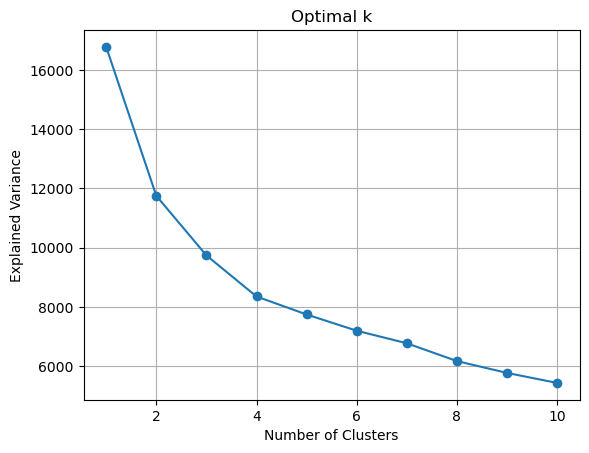

In [33]:
# Elbow method for finding best k value

# Select range of values (let's do 1-10 for now)
k_values = range(1, 11)

explained_variances = [] #initialzing list

# Fit model for diff values of k and calculate variance
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    explained_variances.append(kmeans.inertia_)

# Plot explained variances
plt.plot(k_values, explained_variances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Explained Variance')
plt.title('Optimal k')
plt.grid(True)
plt.show()

It looks like the optimal value for k is 4.

**Starting k-Means Clustering**

In [34]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=0)

# fit the model to the data
cluster_labels = kmeans.fit_predict(df)

/Users/starry/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
print(cluster_labels)

[0 0 0 2 2 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 1 0 0 2 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 1 1 0 0 2 1 1 2 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 2 3 0 2 1 0 0 2 0 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2
 0 1 2 1 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 0 1 2 0 2 0 0 0 0 0 0 0
 1 0 0 0 0 2 3 0 2 1 0 0 2 0 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0
 2 0 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0
 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0
 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1
 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0
 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2
 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0
 0 0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0
 2 1 0 0 2 2 1 2 0 2 0 0 

In [36]:
df['Cluster_Id'] = cluster_labels
df.head()

,# total population,# female population,# male population,# female younger population (0 - 14 years),# male younger population (0 - 14 years),# total younger population (0 - 14 years),# female older population (60 years and up),# male older population (60 years and up),# total older population (60 years and up),# registered IDPs,# people exposed,# people affected,# people in need,# people in level 1 humanitarian condition,# people in level 2 humanitarian condition,# people in level 3 humanitarian condition,# people in level 4 humanitarian condition,# people in level 5 humanitarian condition,# km² landmass affected,# km² controlled by Ukrainian authorities/forces,# km² controlled by Russian forces,# km² unconfirmed control,# battles,# explosions/remote violence,# violence against civilians,# fatalities,# civilian fatalities,# civilian injuries,# total infrastructure damage,# total access events,# unemployed people,scaled_time,oblast_Cherkaska,oblast_Chernihivska,oblast_Chernivetska,oblast_Dnipropetrovska,oblast_Donetska,oblast_Ivano-Frankivska,oblast_Kharkivska,oblast_Khersonska,oblast_Khmelnytska,oblast_Kirovohradska,oblast_Kyiv,oblast_Kyivska,oblast_Luhanska,oblast_Lvivska,oblast_Mykolaivska,oblast_Odeska,oblast_Poltavska,oblast_Rivnenska,oblast_Sumska,oblast_Ternopilska,oblast_Vinnytska,oblast_Volynska,oblast_Zakarpatska,oblast_Zaporizka,oblast_Zhytomyrska,Cluster_Id
0,-0.591140,-0.577772,-0.614932,-0.823883,-0.801209,-0.812206,-0.404874,-0.409386,-0.406802,-0.893337,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,0.139033,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,1.697981,-1.6476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.834609,-0.817863,-0.885915,-1.095502,-1.114387,-1.105280,-0.545894,-0.636307,-0.579102,-0.921143,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.271090,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,0.422435,-1.6476,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.909394,-0.930336,-0.922953,-0.863489,-0.857646,-0.860499,-0.920419,-0.876216,-0.905034,-0.960604,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,-1.188331,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,-0.505659,-1.6476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.693271,1.814066,1.761675,2.072754,2.044082,2.058019,1.576241,1.349583,1.495099,-0.406555,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.272640,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,3.156909,-1.6476,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.818108,3.006281,2.914634,1.647321,1.662210,1.655052,3.567342,3.622826,3.590034,3.126069,2.655662,2.876914,2.876914,-1.403374,0.0,-0.99609,-0.267668,-0.233646,0.504218,-0.001609,0.434783,1.128277,0.904314,0.259875,-0.219556,-0.352610,-0.323426,-0.347247,-0.28605,-0.51654,0.315496,-1.6476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df.to_csv('kmeans.csv', index=False)

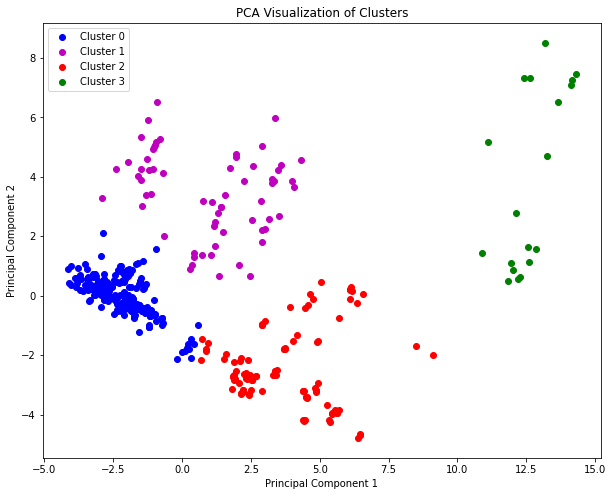

In [14]:
# PCA visualization of clusters

pca = PCA(n_components=2)  # Keep the first two principal components
principal_components = pca.fit_transform(df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to pca_df
pca_df['Cluster'] = cluster_labels

colors = ['b', 'm', 'r', 'g']
plt.figure(figsize=(10, 8))

for cluster in range(4): # k=4 clusters
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend(loc='best')

plt.show()

In [15]:
cluster_means = pca_df.groupby('Cluster').mean()
print(cluster_means)

               PC1       PC2
Cluster                     
0        -2.176859 -0.013125
1         0.949560  3.426535
2         3.652090 -2.500683
3        12.632961  3.869702


**Finding Feature Importance**

In [19]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=48)

# Fit the model on data
clf.fit(df, cluster_labels)

# Get feature importances and their labels
importances = clf.feature_importances_
feature_labels = df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_labels, 'Importance': importances})

# Sort importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                             Feature    Importance
1                                # female population  8.070853e-02
2                                  # male population  7.650293e-02
8         # total older population (60 years and up)  6.873765e-02
20                # km² controlled by Russian forces  6.741090e-02
6        # female older population (60 years and up)  6.213507e-02
5          # total younger population (0 - 14 years)  6.122757e-02
7          # male older population (60 years and up)  5.778899e-02
3         # female younger population (0 - 14 years)  4.863106e-02
19  # km² controlled by Ukrainian authorities/forces  4.833269e-02
0                                 # total population  4.804739e-02
10                                  # people exposed  4.676564e-02
4           # male younger population (0 - 14 years)  4.141715e-02
22                                         # battles  3.167689e-02
25                                      # fatalities  3.083945

## Hierarchical Clustering

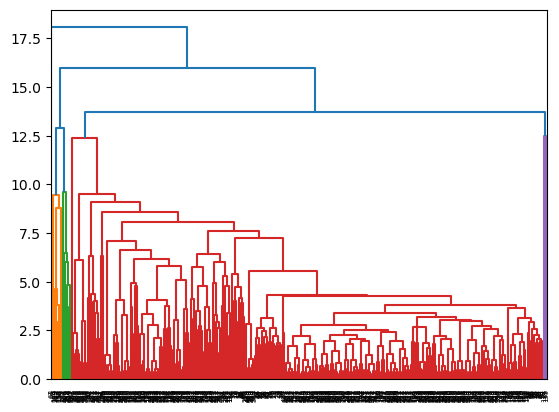

In [40]:
linkings = linkage(df, method = "average", metric='euclidean') #using euclidean instead of explicitly stating amount
dendrogram(linkings)
plt.show()

In [41]:
cluster_labels = cut_tree(linkings, n_clusters=5).reshape(-1, ) #shows where each cluster landed in
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
df['Cluster_Labels'] = cluster_labels

df.head()


,# total population,# female population,# male population,# female younger population (0 - 14 years),# male younger population (0 - 14 years),# total younger population (0 - 14 years),# female older population (60 years and up),# male older population (60 years and up),# total older population (60 years and up),# registered IDPs,# people exposed,# people affected,# people in need,# people in level 1 humanitarian condition,# people in level 2 humanitarian condition,# people in level 3 humanitarian condition,# people in level 4 humanitarian condition,# people in level 5 humanitarian condition,# km² landmass affected,# km² controlled by Ukrainian authorities/forces,# km² controlled by Russian forces,# km² unconfirmed control,# battles,# explosions/remote violence,# violence against civilians,# fatalities,# civilian fatalities,# civilian injuries,# total infrastructure damage,# total access events,# unemployed people,scaled_time,oblast_Cherkaska,oblast_Chernihivska,oblast_Chernivetska,oblast_Dnipropetrovska,oblast_Donetska,oblast_Ivano-Frankivska,oblast_Kharkivska,oblast_Khersonska,oblast_Khmelnytska,oblast_Kirovohradska,oblast_Kyiv,oblast_Kyivska,oblast_Luhanska,oblast_Lvivska,oblast_Mykolaivska,oblast_Odeska,oblast_Poltavska,oblast_Rivnenska,oblast_Sumska,oblast_Ternopilska,oblast_Vinnytska,oblast_Volynska,oblast_Zakarpatska,oblast_Zaporizka,oblast_Zhytomyrska,Cluster_Id,Cluster_Labels
0,-0.591140,-0.577772,-0.614932,-0.823883,-0.801209,-0.812206,-0.404874,-0.409386,-0.406802,-0.893337,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,0.139033,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,1.697981,-1.6476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.834609,-0.817863,-0.885915,-1.095502,-1.114387,-1.105280,-0.545894,-0.636307,-0.579102,-0.921143,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.271090,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,0.422435,-1.6476,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.909394,-0.930336,-0.922953,-0.863489,-0.857646,-0.860499,-0.920419,-0.876216,-0.905034,-0.960604,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,-1.188331,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,-0.505659,-1.6476,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.693271,1.814066,1.761675,2.072754,2.044082,2.058019,1.576241,1.349583,1.495099,-0.406555,-1.606722,-1.090594,-1.090594,-1.403374,0.0,-0.99609,-0.267668,-0.233646,-2.451068,1.272640,-0.436567,-0.271362,-0.290911,-0.429690,-0.219556,-0.366446,-0.323426,-0.347247,-0.28605,-0.51654,3.156909,-1.6476,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.818108,3.006281,2.914634,1.647321,1.662210,1.655052,3.567342,3.622826,3.590034,3.126069,2.655662,2.876914,2.876914,-1.403374,0.0,-0.99609,-0.267668,-0.233646,0.504218,-0.001609,0.434783,1.128277,0.904314,0.259875,-0.219556,-0.352610,-0.323426,-0.347247,-0.28605,-0.51654,0.315496,-1.6476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
df.to_csv('h_avg.csv', index=False) #csv file showing assigned cluster labels from 0 1 2 3
